<center><h1>Toronto Neighbourhood Segmentation Assignment:</h1></center>

<center><h2>IBM Applied Data Science Capstone:</h2></center>

<strong>Part I: Scrape Wikipedia Table & Format Dataframe </strong>

In [10]:
import pandas as pd
import requests 

site_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
df = pd.read_html(site_url, header=0)[0]
df.drop(df[df['Borough'] == "Not assigned"].index, inplace=True) #removes rows where the borough is not assigned. 
df.Borough[df.Neighbourhood == 'Not assigned'] = df.Borough #alters rows where the neighbourhood is not assigned to reflect the borough.
df




,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
9,M9A,Queen's Park,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [24]:
df.shape

(210, 3)

<strong>Part II: Merge Dataframe with Location Data</strong>

In [11]:
!wget -q -O 'geo.csv' https://cocl.us/Geospatial_data
data = pd.read_csv("geo.csv") 

merged = pd.merge(df, data, how='left', on=None, left_on='Postcode', right_on='Postal Code',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merged = merged.drop('Postcode', 1)
merged


,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,Scarborough,Rouge,M1B,43.806686,-79.194353
1,Scarborough,Malvern,M1B,43.806686,-79.194353
2,Scarborough,Highland Creek,M1C,43.784535,-79.160497
3,Scarborough,Rouge Hill,M1C,43.784535,-79.160497
4,Scarborough,Port Union,M1C,43.784535,-79.160497
5,Scarborough,Guildwood,M1E,43.763573,-79.188711
6,Scarborough,Morningside,M1E,43.763573,-79.188711
7,Scarborough,West Hill,M1E,43.763573,-79.188711
8,Scarborough,Woburn,M1G,43.770992,-79.216917
9,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


<strong>Part III: Cluster Data & Create Visualization</strong>

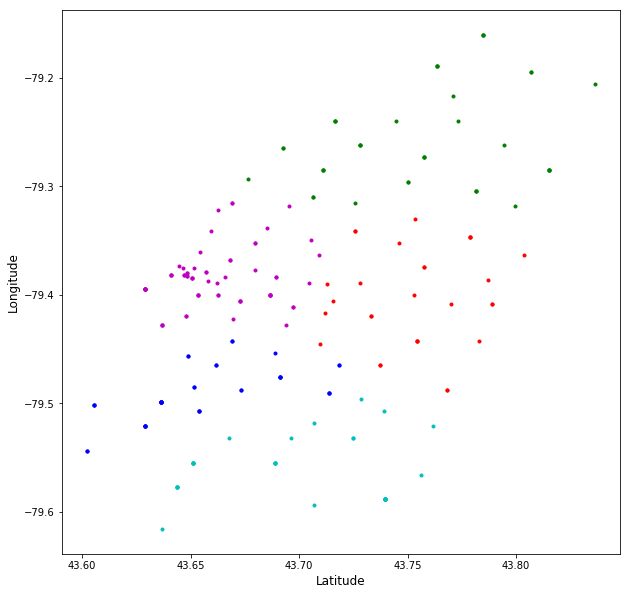

sad


In [15]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.10.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

!wget -q -O 'geo.csv' https://cocl.us/Geospatial_data

from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import webbrowser
import pandas as pd
import requests

site_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
df = pd.read_html(site_url, header=0)[0]
df.drop(df[df['Borough'] == "Not assigned"].index, inplace=True) #removes rows where the borough is not assigned.
df.Borough[df.Neighbourhood == 'Not assigned'] = df.Borough #alters rows where the neighbourhood is not assigned to reflect the borough.

data = pd.read_csv("geo.csv")

merged = pd.merge(df, data, how='left', on=None, left_on='Postcode', right_on='Postal Code',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merged = merged.drop('Postcode', 1)
merged = pd.merge(df, data, how='left', on=None, left_on='Postcode', right_on='Postal Code',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merged = merged.drop('Postcode', 1)
X=merged.loc[:,['Latitude','Longitude']]
id_n=5
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(10,10))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.Latitude[cluster].values,X.Longitude[cluster].values,ptsymb[i])
plt.show()
cluster0, cluster1, cluster2, cluster3, cluster4 = [],[],[],[],[]
cluster0pop, cluster1pop, cluster2pop, cluster3pop, cluster4pop, = [],[],[],[],[]
counter = 0
for idval in id_label:
    if idval == 0:
        cluster0.append([merged.iloc[counter]["Latitude"], merged.iloc[counter]["Longitude"]])
        cluster0pop.append(str(merged.iloc[counter]["Neighbourhood"]) + " - ("+str(merged.iloc[counter]["Postal Code"]) + ") ")
    if idval == 1:
        cluster1.append([merged.iloc[counter]["Latitude"], merged.iloc[counter]["Longitude"]])
        cluster1pop.append(str(merged.iloc[counter]["Neighbourhood"]) + " - (" + str(merged.iloc[counter]["Postal Code"]) + ") ")
    if idval == 2:
        cluster2.append([merged.iloc[counter]["Latitude"], merged.iloc[counter]["Longitude"]])
        cluster2pop.append(str(merged.iloc[counter]["Neighbourhood"]) + " - (" + str(merged.iloc[counter]["Postal Code"]) + ") ")
    if idval == 3:
        cluster3.append([merged.iloc[counter]["Latitude"], merged.iloc[counter]["Longitude"]])
        cluster3pop.append(str(merged.iloc[counter]["Neighbourhood"]) + " - (" + str(merged.iloc[counter]["Postal Code"]) + ") ")
    if idval == 4:
        cluster4.append([merged.iloc[counter]["Latitude"], merged.iloc[counter]["Longitude"]])
        cluster4pop.append(str(merged.iloc[counter]["Neighbourhood"]) + " - (" + str(merged.iloc[counter]["Postal Code"]) + ") ")
    counter+=1
tor_map = folium.Map(location=[43.6748, -79.4041], zoom_start=12)
feature_group = folium.FeatureGroup("Cluster 0:")
for i in range(0, len(cluster0)):
    feature_group.add_child(folium.Marker(location=cluster0[i],popup=cluster0pop[i], icon=folium.Icon(color='red')))
tor_map.add_child(feature_group)
feature_group = folium.FeatureGroup("Cluster 1:")
for i in range(0, len(cluster1)):
    feature_group.add_child(folium.Marker(location=cluster1[i],popup=cluster1pop[i], icon=folium.Icon(color='green')))
tor_map.add_child(feature_group)
feature_group = folium.FeatureGroup("Cluster 2:")
for i in range(0, len(cluster2)):
    feature_group.add_child(folium.Marker(location=cluster2[i],popup=cluster2pop[i], icon=folium.Icon(color='darkblue')))
tor_map.add_child(feature_group)
feature_group = folium.FeatureGroup("Cluster 3:")
for i in range(0, len(cluster3)):
    feature_group.add_child(folium.Marker(location=cluster3[i],popup=cluster3pop[i], icon=folium.Icon(color='purple')))
tor_map.add_child(feature_group)
feature_group = folium.FeatureGroup("Cluster 4:")
for i in range(0, len(cluster4)):
    feature_group.add_child(folium.Marker(location=cluster4[i],popup=cluster4pop[i], icon=folium.Icon(color='orange')))
tor_map.add_child(feature_group)
tor_map.save(outfile= "map.html")


In [16]:
<a href="https://mystifying-jang-cdf0b9.netlify.com/">Static Hosted w/ Net</a>




<strong>(Screenshot of interactive map if the above has issues rendering due to older versions of the folium module)</strong>

<div align="left">
  <img src='https://i.imgur.com/0s7pw0f.png' align="left">
</div>